# Setup
---

In [144]:
import numpy as np # linear algebra|
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [145]:
df = pd.read_csv('/kaggle/input/multimodal-all-kcv/full_dataset.csv')

In [146]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

ID       Price                                              Title  \
0   0  4200000000  Rumah MINIMALIS SIAP HUNI di Perumahan SAN ANT...   
1   1  7200000000  RUMAH MEWAH 2 LANTAI DI PAKUWON CITY LAGUNA RE...   
2   2  1600000000  Rumah Jual Murah Butuh Uang Griya Asri Pakuwon...   
3   3  2170000000  Rumah Pakuwon City Suvadiva Mulyorejo oerr mer...   
4   4  2800000000  Rumah Hook Lebar 12M Lokasi PAKUWON CITY Clust...   

                                         Address  Kamar Tidur  Kamar Mandi  \
0  Pakuwon City, Mulyorejo, Surabaya, Jawa Timur          3.0          2.0   
1                 Kenjeran, Surabaya, Jawa Timur          4.0          4.0   
2  Pakuwon City, Mulyorejo, Surabaya, Jawa Timur          3.0          2.0   
3                Mulyorejo, Surabaya, Jawa Timur          3.0          2.0   
4  Pakuwon City, Mulyorejo, Surabaya, Jawa Timur          3.0          4.0   

   Luas Tanah  Luas Bangunan       Nama Perumahan Sertifikat  ...  Tipe Iklan  \
0       180.0          200.0         Pakuwon City        SHM  ...        Sale   
1       313.0          400.0  PAKUWON CITY LAGUNA        SHM  ...        Sale   
2        78.0          200.0         Pakuwon City        SHM  ...        Sale   
3        72.0           97.0                  NaN        NaN  ...        Sale   
4       156.0          145.0         Pakuwon City        SHM  ...        Sale   

   Orientasi Bangunan Tahun Dibangun  Garasi  Latitude   Longitude  \
0               Timur         2007.0     NaN -7.274797  112.812667   
1               Utara         2021.0     1.0 -7.215648  112.769070   
2             Selatan         2023.0     1.0 -7.274797  112.812667   
3             Selatan         2021.0     NaN -7.267977  112.793519   
4             Selatan         2007.0     4.0 -7.274797  112.812667   

     Province      City   District                       images_path  
0  Jawa Timur  Surabaya  Mulyorejo  images/image-rumah-1/image-1.jpg  
1  Jawa Timur  Surabaya   Kenjeran  images/image-rumah-2/image-2.jpg  
2  Jawa Timur  Surabaya  Mulyorejo  images/image-rumah-3/image-3.jpg  
3  Jawa Timur  Surabaya  Mulyorejo  images/image-rumah-4/image-4.jpg  
4  Jawa Timur  Surabaya  Mulyorejo  images/image-rumah-5/image-5.jpg  

[5 rows x 25 columns]

# EDA
---

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df.shape

(1923, 25)

# Tabular
---

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1923 non-null   int64  
 1   Price               1923 non-null   int64  
 2   Title               1923 non-null   object 
 3   Address             1923 non-null   object 
 4   Kamar Tidur         1888 non-null   float64
 5   Kamar Mandi         1895 non-null   float64
 6   Luas Tanah          1922 non-null   float64
 7   Luas Bangunan       1914 non-null   float64
 8   Nama Perumahan      256 non-null    object 
 9   Sertifikat          1668 non-null   object 
 10  Carpots             1026 non-null   float64
 11  Daya Listrik        1207 non-null   float64
 12  Interior            1233 non-null   object 
 13  Jumlah Lantai       1699 non-null   float64
 14  Tipe Properti       1890 non-null   object 
 15  Tipe Iklan          1876 non-null   object 
 16  Orient

## Columns

In [26]:
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric Columns:")
print(numeric_cols.tolist())
print("Total Numeric Columns:", len(numeric_cols))

Numeric Columns:
['ID', 'Price', 'Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan', 'Carpots', 'Daya Listrik', 'Jumlah Lantai', 'Tahun Dibangun', 'Garasi', 'Latitude', 'Longitude']
Total Numeric Columns: 13


In [27]:
object_cols = df.select_dtypes(include='object').columns
print("Object Columns:")
print(object_cols.tolist())
print("Total Object Columns:", len(object_cols))

Object Columns:
['Title', 'Address', 'Nama Perumahan', 'Sertifikat', 'Interior', 'Tipe Properti', 'Tipe Iklan', 'Orientasi Bangunan', 'Province', 'City', 'District', 'images_path']
Total Object Columns: 12


10 column jika dihapus 'Title' dan 'images_path' 

## Descriptive Statistics

In [28]:
# Descriptive statistics for numeric columns (rounded to 1 decimal place)
print("Descriptive Statistics for Numeric Columns:\n")
df.select_dtypes(include=['number']).describe().round(1)

Descriptive Statistics for Numeric Columns:



ID         Price  Kamar Tidur  Kamar Mandi  Luas Tanah  \
count  1923.0  1.923000e+03       1888.0       1895.0      1922.0   
mean   1058.2  3.624785e+09          4.0          3.0       217.5   
std     596.4  7.652692e+09          2.9          2.7       515.9   
min       0.0  1.200000e+08          1.0          1.0         3.0   
25%     540.5  1.100000e+09          3.0          2.0        91.0   
50%    1073.0  1.950000e+09          3.0          3.0       135.0   
75%    1566.5  3.500000e+09          4.0          3.0       226.8   
max    2086.0  1.970000e+11         46.0         46.0     14175.0   

       Luas Bangunan  Carpots  Daya Listrik  Jumlah Lantai  Tahun Dibangun  \
count   1.914000e+03   1026.0        1207.0         1699.0           449.0   
mean    4.179731e+08      1.5        2987.6            1.6          2017.9   
std     1.828601e+10      1.0        2478.0            0.6             8.2   
min     2.000000e+00      1.0         900.0            1.0          1980.0   
25%     9.600000e+01      1.0        1300.0            1.0          2015.0   
50%     1.550000e+02      1.0        2200.0            2.0          2020.0   
75%     2.500000e+02      2.0        3500.0            2.0          2024.0   
max     8.000000e+11     12.0       33000.0            6.0          2025.0   

       Garasi  Latitude  Longitude  
count   346.0    1898.0     1898.0  
mean      1.5      -7.4      112.7  
std       1.2       0.2        0.1  
min       1.0      -8.0      112.5  
25%       1.0      -7.5      112.7  
50%       1.0      -7.3      112.7  
75%       2.0      -7.3      112.8  
max      13.0      -7.2      112.8

dapat di amati, banyak perlompatan dari 75% ke max value seperti
- carpots 2 -> 12
- Garasi 2 -> 13
- Price  3.5e+09 ->  1.9e+11
- Dll


ini menunjukan datanya tidak bersih outlier

In [29]:
# Descriptive statistics for object columns (like count, unique, top, freq)
print("\nDescriptive Statistics for Object Columns:\n")
df.select_dtypes(include=['object']).describe()


Descriptive Statistics for Object Columns:



Title  \
count                                             1923   
unique                                            1858   
top     RUMAH NEW 3 LANTAI DI DHARMAHUSADA INDAH BARAT   
freq                                                 9   

                               Address Nama Perumahan Sertifikat     Interior  \
count                             1923            256       1668         1233   
unique                             126            173          6            3   
top     Gedangan, Sidoarjo, Jawa Timur              -        SHM  Unfurnished   
freq                               169              9       1589          927   

       Tipe Properti Tipe Iklan Orientasi Bangunan    Province      City  \
count           1890       1876                242        1923      1923   
unique             1          1                 14           1         3   
top            Rumah       Sale              Utara  Jawa Timur  Surabaya   
freq            1890       1876                 76        1923      1068   

        District                       images_path  
count       1915                              1923  
unique        33                              1923  
top     Sidoarjo  images/image-rumah-1/image-1.jpg  
freq         176                                 1

jika object dapat digunakan dengan baik, dapat membantu Model inilah hal yang diamati
- Title dapat digunakan untuk NLP, dan image_path dapat digunakan sebagai CV.
- ada 3 column yang memiliki unik value sama dengan 1, yaitu 'Tipe Properti','Tipe Iklan' dan 'Province', menunjukan bahwa data tersebut tdk bisa digunakan
- banyak data count yang kurang, berarti banyak data NAN


ini menunjukan datanya tidak bersih outlier

## Missing Data

In [30]:
train_na = (df.isna().sum() / len(df) * 100).round(2)
na_df = pd.DataFrame({'Train_NA(%)': train_na})
#na_df = na_df[na_df['Train_NA(%)'] > 0]  # Optional: show only columns with missing values
na_df = na_df.sort_values(by='Train_NA(%)', ascending=False)
print(na_df)

                    Train_NA(%)
Orientasi Bangunan        87.42
Nama Perumahan            86.69
Garasi                    82.01
Tahun Dibangun            76.65
Carpots                   46.65
Daya Listrik              37.23
Interior                  35.88
Sertifikat                13.26
Jumlah Lantai             11.65
Tipe Iklan                 2.44
Kamar Tidur                1.82
Tipe Properti              1.72
Kamar Mandi                1.46
Longitude                  1.30
Latitude                   1.30
Luas Bangunan              0.47
District                   0.42
Luas Tanah                 0.05
Province                   0.00
City                       0.00
ID                         0.00
Price                      0.00
Address                    0.00
Title                      0.00
images_path                0.00


#### 🔹 Low Missingness (0% - 2.44%)

| Level         | Range (%)        | Feature Count | Numeric Count | Object Count | Features                                                                 |
|---------------|------------------|----------------|---------------|--------------|--------------------------------------------------------------------------|
| **No Missing**| 0.00 - 0.05      | 9              | 2             | 7            | Luas Tanah, Province, City, ID, Price, Address, Title, images_path       |
| **Low**       | 0.42 - 2.44      | 8              | 4             | 4            | Tipe Iklan, Kamar Tidur, Tipe Properti, Kamar Mandi, Longitude, Latitude, Luas Bangunan, District |
| **Subtotal**  | —                | **17**         | **6**         | **11**       | —                                                                        |

#### 🔸 Mid to High Missingness (11.65% - 87.42%)

| Level         | Range (%)        | Feature Count | Numeric Count | Object Count | Features                                                                 |
|---------------|------------------|----------------|---------------|--------------|--------------------------------------------------------------------------|
| **Mid-Low**   | 11.65 - 13.26    | 2              | 1             | 1            | Sertifikat, Jumlah Lantai                                                |
| **Mid**       | 35.88 - 46.65    | 3              | 2             | 1            | Carpots, Daya Listrik, Interior                                          |
| **Very High** | 76.65 - 87.42    | 4              | 2             | 2            | Orientasi Bangunan, Nama Perumahan, Garasi, Tahun Dibangun              |
| **Subtotal**  | —                | **9**          | **5**         | **4**        | —                                                                        |

numeric memiliki banyak NAN di range percent lebih tinggi, object column harus di utilisasi dengan benar

In [31]:
# Select object columns
obj_cols = df.select_dtypes(include='object').columns

# Print unique values for each relevant object column
for col in obj_cols:
    if col in ['images_path', 'Title', 'Address','Nama Perumahan']:
        continue  # Skip specified columns
    
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) <= 1:
        continue  # Skip columns with only one unique value

    print(f"\nKolom: {col} ({len(unique_vals)} nilai unik)")
    print(unique_vals)



Kolom: Sertifikat (6 nilai unik)
['SHM' 'HGB' 'Lain-lain' 'Hak Pakai' 'Strata Title' 'PPJB']

Kolom: Interior (3 nilai unik)
['Unfurnished' 'Semi Furnished' 'Full Furnished']

Kolom: Orientasi Bangunan (14 nilai unik)
['Timur' 'Utara' 'Selatan' 'Barat' 'Unknown' 'Hook' 'Barat Daya' '3' '1'
 '4' 'Timur Laut' '2' '9' 'Barat Laut']

Kolom: City (3 nilai unik)
['Surabaya' 'Sidoarjo' 'Malang']

Kolom: District (33 nilai unik)
['Mulyorejo' 'Kenjeran' 'Pakuwon City' 'Surabaya Kota' 'Sukolilo'
 'Pakuwon CIty' 'Pakuwon Indah' 'Kertajaya' 'Kalisari' 'Sutorejo' 'Gubeng'
 'Rungkut' 'Tenggilis Mejoyo' 'Dukuh Pakis' 'Waru' 'Sidoarjo' 'Gedangan'
 'Lowokwaru' 'Soekarno Hatta' 'Jatimulyo' 'Griya Shanta' 'Malang Kota'
 'Blimbing' 'Mojolangu' 'Permata Jingga' 'Sukun' 'Merjosari' 'Dinoyo'
 'Tlogomas' 'Dau' 'Pakis' 'Kedungkandang' 'Wagir']


cara mengisi NAN value pada object
- Nama Perumahan bisa diisi dengan '-'
- Sertifikat bisa diisi dengan 'Lain-lain'
- Orientasi Banguna bisa diisi dengan 'Unknown'
- dan yang lain bisa mengunakan modus atau NAN flag

## Univariate

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


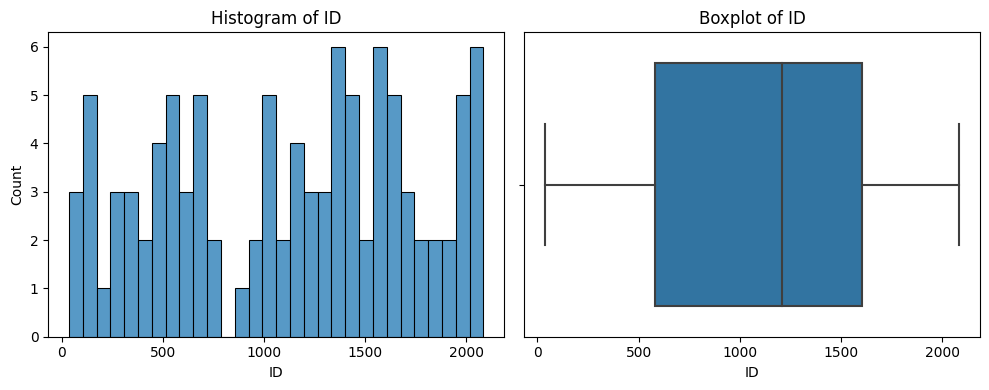

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


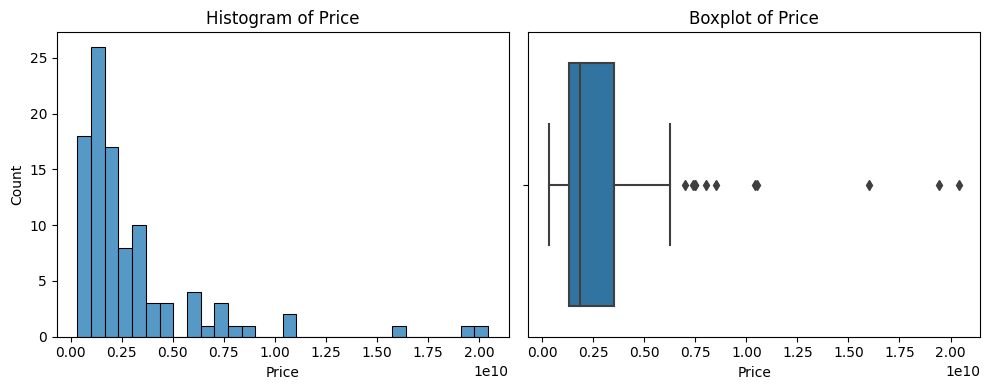

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


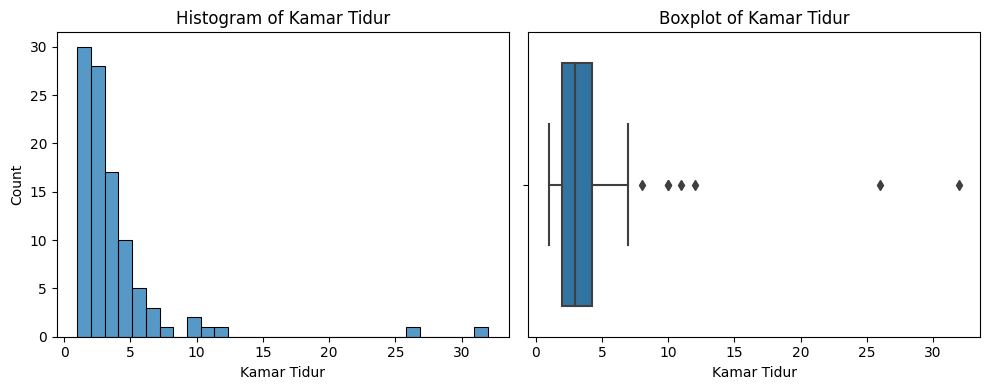

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


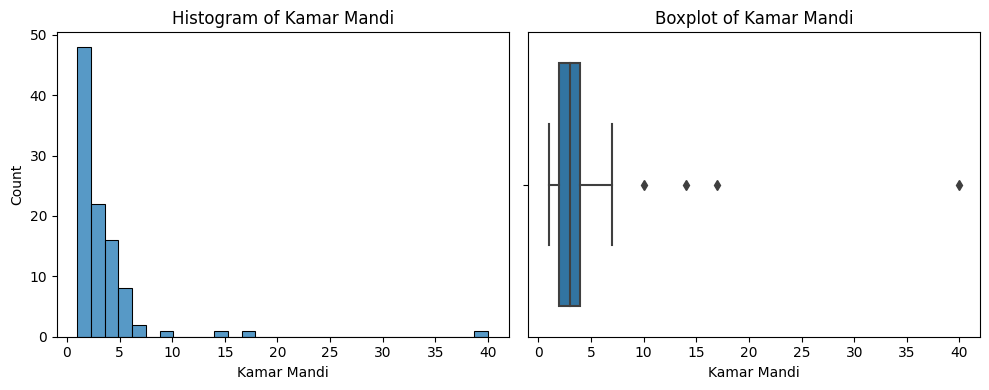

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


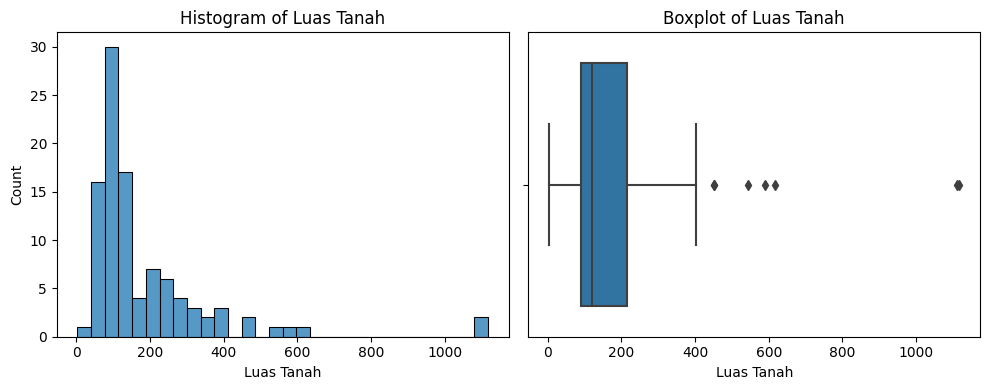

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


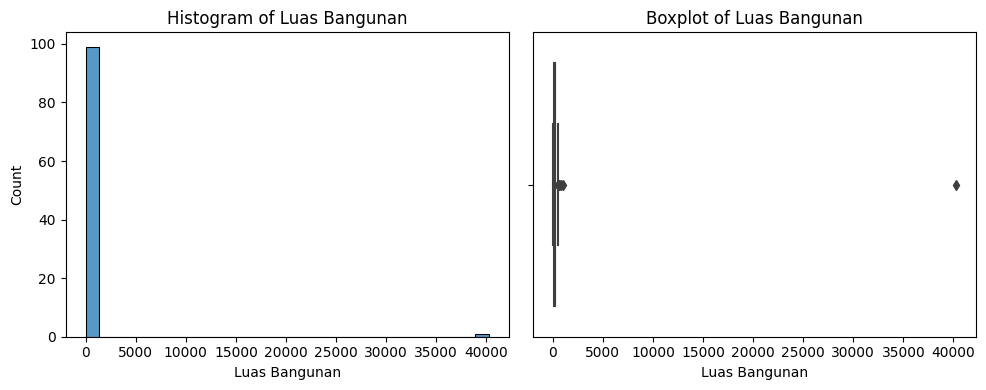

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


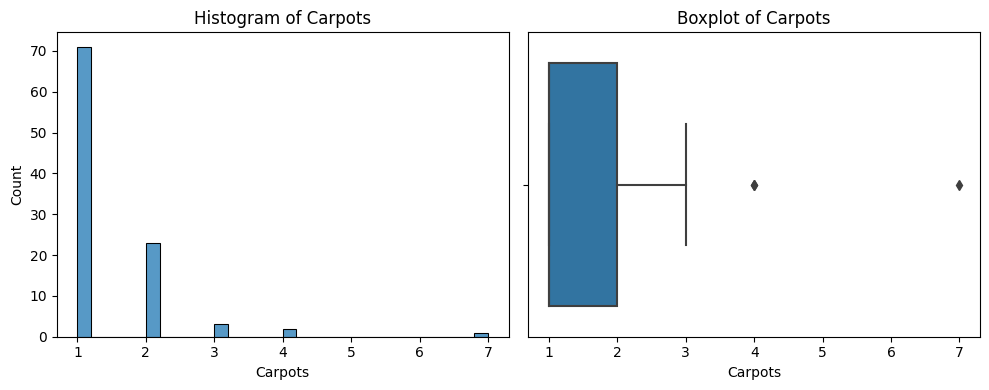

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


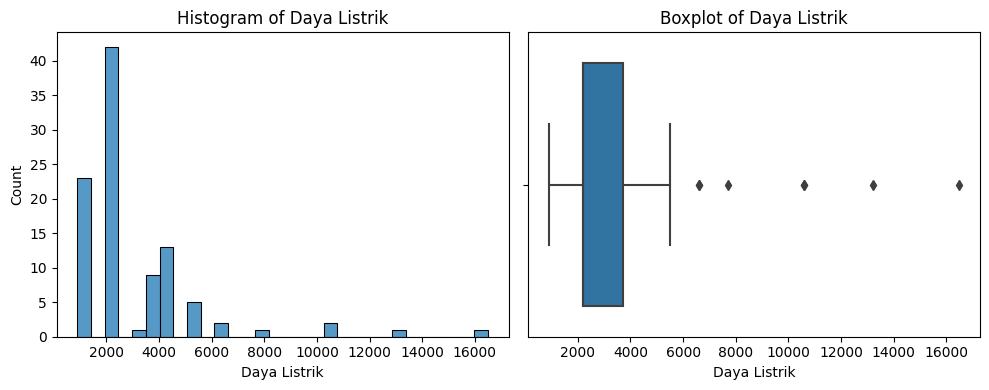

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


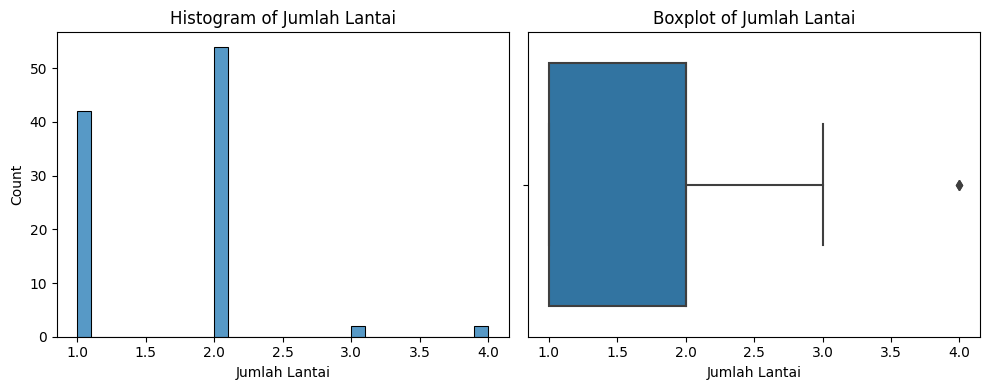

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


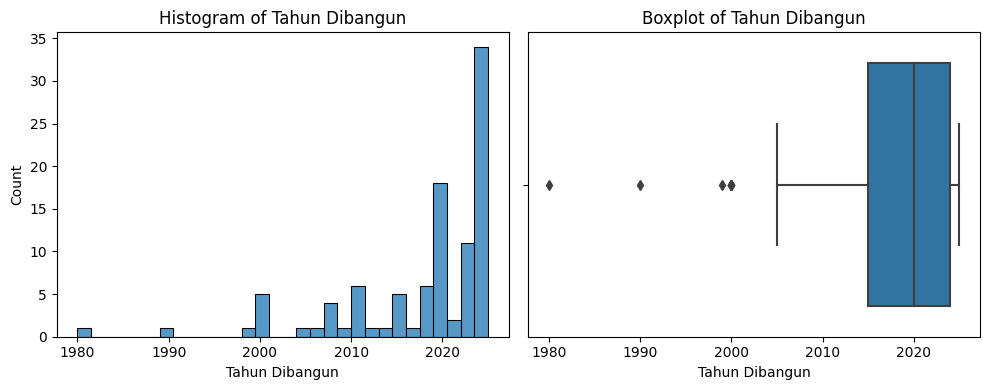

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


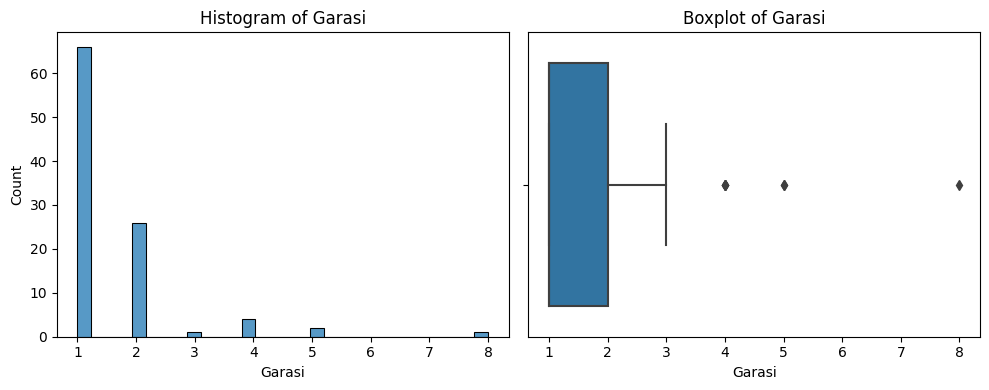

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


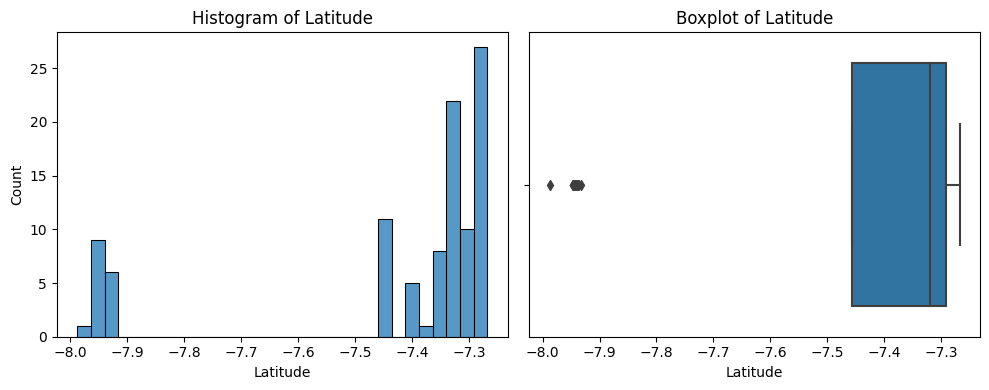

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


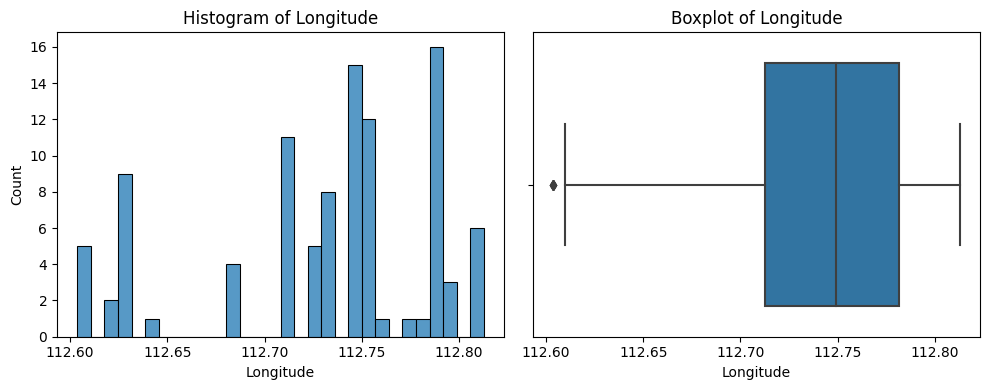

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for col in df.select_dtypes(include='number').columns:
    # Clean: remove inf and NaN
    clean_series = df[col].replace([np.inf, -np.inf], np.nan).dropna()

    if clean_series.empty:
        print(f"Skipping {col} (empty after cleaning)")
        continue

    # Sample max 10,000 values for memory safety
    if len(clean_series) > 100:
        clean_series = clean_series.sample(100, random_state=42)

    plt.figure(figsize=(10, 4))

    # Histogram (no KDE to reduce RAM)
    plt.subplot(1, 2, 1)
    sns.histplot(clean_series, kde=False, bins=30)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=clean_series)
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [33]:
import pandas as pd
from scipy.stats import skew, kurtosis

stats = []

for col in df.select_dtypes(include='number').columns:
    if col.lower() == 'id':
        continue  # Skip ID
    # Clean: remove inf and NaN
    clean_series = df[col].replace([np.inf, -np.inf], np.nan).dropna()

    if clean_series.empty:
        continue

    # Compute stats
    col_skew = skew(clean_series)
    col_kurt = kurtosis(clean_series)
    
    q10 = clean_series.quantile(0.10)
    q90 = clean_series.quantile(0.90)
    outliers = ((clean_series < q10) | (clean_series > q90)).sum()
    outlier_pct = (outliers / len(clean_series)) * 100

    stats.append({
        'Feature': col,
        'Skew': round(col_skew, 2),
        'Kurtosis': round(col_kurt, 2),
        '% Outliers (10-90%)': round(outlier_pct, 2),
    })

# Turn into DataFrame
stats_df = pd.DataFrame(stats)
pd.set_option('display.max_rows', None)
display(stats_df.sort_values('% Outliers (10-90%)', ascending=False))


Feature   Skew  Kurtosis  % Outliers (10-90%)
0            Price  12.42    244.92                19.03
4    Luas Bangunan  43.71   1909.00                18.55
3       Luas Tanah  21.88    568.09                15.87
10        Latitude  -1.56      0.67                15.17
11       Longitude  -0.66     -0.47                12.75
8   Tahun Dibangun  -1.53      2.08                10.02
1      Kamar Tidur   5.38     46.59                 9.22
6     Daya Listrik   4.49     32.61                 8.53
9           Garasi   5.10     36.04                 6.65
5          Carpots   5.03     36.48                 5.75
2      Kamar Mandi   6.44     67.06                 5.33
7    Jumlah Lantai   0.49      1.62                 3.12

| Fitur             | Skew  | Kurtosis | % Outlier (10–90%) | Tipe Skew      | Tipe Kurtosis   |
|-------------------|-------|----------|---------------------|----------------|-----------------|
| Luas Bangunan     | 43.71 | 1909.00  | 18.55%              | Sangat Kanan   | Sangat Berat    |
| Luas Tanah        | 21.88 | 568.09   | 15.87%              | Sangat Kanan   | Sangat Berat    |
| Harga             | 12.42 | 244.92   | 19.03%              | Sangat Kanan   | Sangat Berat    |
| Kamar Mandi       | 6.44  | 67.06    | 5.33%               | Sangat Kanan   | Sangat Berat    |
| Kamar Tidur       | 5.38  | 46.59    | 9.22%               | Sangat Kanan   | Berat           |
| Carports          | 5.03  | 36.48    | 5.75%               | Sangat Kanan   | Berat           |
| Garasi            | 5.10  | 36.04    | 6.65%               | Sangat Kanan   | Berat           |
| Daya Listrik      | 4.49  | 32.61    | 8.53%               | Sangat Kanan   | Berat           |
| Tahun Dibangun    | -1.53 | 2.08     | 10.02%              | Sangat Kiri    | Hampir Normal   |
| Jumlah Lantai     | 0.49  | 1.62     | 3.12%               | Sedikit Kanan  | Ringan          |
| Latitude          | -1.56 | 0.67     | 15.17%              | Sangat Kiri    | Ringan          |
| Longitude         | -0.66 | -0.47    | 12.75%              | Agak Kiri      | Ringan          |


### Skewness (Kemiringan)
- **0** → Simetris  
- **0.5 – 1.0 / -0.5 – -1.0** → Condong ringan  
- **> 1.0 / < -1.0** → Sangat condong  
- **> 2.0 / < -2.0** → Ekstrem

➡ Positif = Ekor kanan panjang  
➡ Negatif = Ekor kiri panjang

---

### Kurtosis (Ketebalan Ekor)
- **< 3** → Ringan  
- **≈ 3** → Normal  
- **3 – 10** → Berat  
- **> 10** → Sangat berat  
- **> 100** → Ekstrem

➡ Semakin tinggi, semakin banyak outlier

---

### % Outlier (10–90%)
- **< 5%** → Sedikit  
- **5% – 10%** → Rendah  
- **10% – 20%** → Cukup tinggi  
- **> 20%** → Tinggi

---

## Coorelation int column for Price

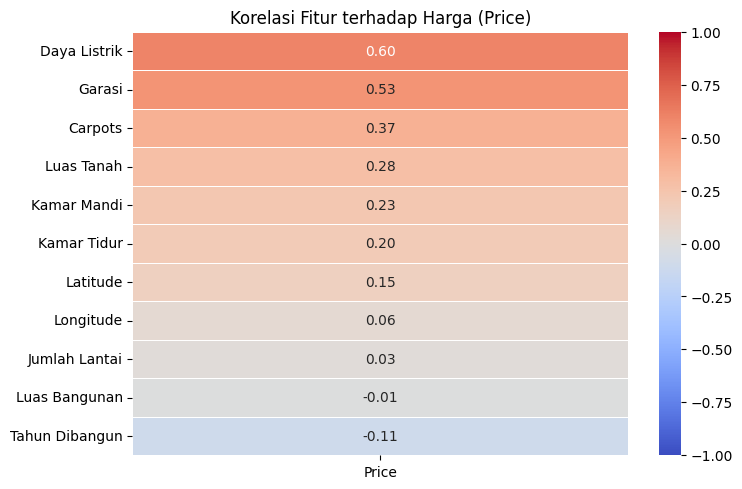

Rata-rata Korelasi terhadap Harga (Price): 0.21


In [34]:
# Select only numeric columns
int_df = df.select_dtypes(include=['int64', 'float64'])

# Drop 'ID' column if present
if 'ID' in int_df.columns:
    int_df = int_df.drop(columns=['ID'])

# Compute correlation matrix
corr_matrix = int_df.corr()

# Drop the row where index is 'Price' (so 'Price' isn't correlated with itself)
corr_matrix_no_self = corr_matrix.drop(index='Price')

# Get correlation of all features with 'Price'
price_corr = corr_matrix_no_self['Price'].sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(8, len(price_corr) * 0.5))
sns.heatmap(price_corr.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Korelasi Fitur terhadap Harga (Price)")
plt.show()

# Show mean correlation with Price
mean_corr = price_corr.mean()
print(f"Rata-rata Korelasi terhadap Harga (Price): {mean_corr:.2f}")

karena kebanyakan fitur integer memiliki skew tinggi, apa yang terjadi jika do log?

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


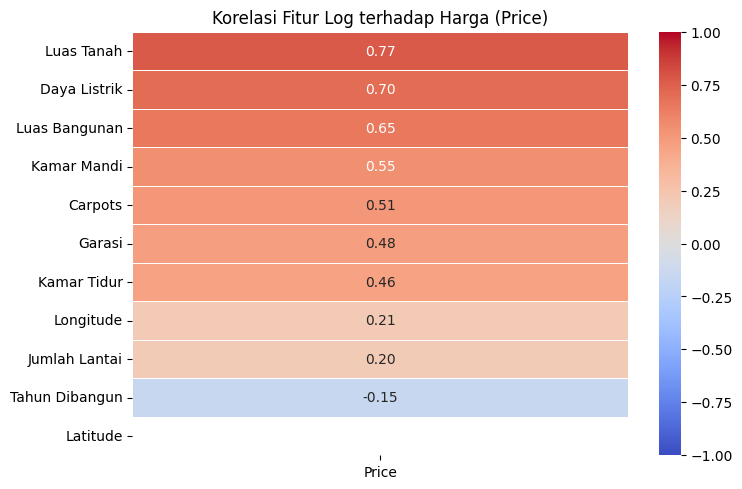

Rata-rata Korelasi Log terhadap Harga (Price): 0.44


In [35]:
import numpy as np

# Select numeric columns and drop 'ID' if present
int_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['ID'], errors='ignore')

# Log-transform all numeric columns using log1p (log(1 + x)) to handle zeros
log_df = np.log1p(int_df)

# Recompute correlation matrix with log-transformed data
log_corr_matrix = log_df.corr()

# Drop the 'Price' row (so it doesn't correlate with itself)
log_corr_matrix_no_self = log_corr_matrix.drop(index='Price')

# Get correlation of all features with 'Price'
log_price_corr = log_corr_matrix_no_self['Price'].sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(8, len(log_price_corr) * 0.5))
sns.heatmap(log_price_corr.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Korelasi Fitur Log terhadap Harga (Price)")
plt.show()

# Show mean correlation with Price
mean_log_corr = log_price_corr.mean()
print(f"Rata-rata Korelasi Log terhadap Harga (Price): {mean_log_corr:.2f}")

dapat diamati dengan membuat fitur log menaikan rata-rata korelasi dari 0.21 -> 0.44, mar kita lihat luas tanah,luas bangunan vs price

In [36]:
# Function to plot scatter and regression line
def plot_with_regression(ax, x, y, xlabel, ylabel, title, color):
    ax.scatter(x, y, alpha=0.5, color=color, label="Data Points")
    
    # Fit linear regression line (without ML model)
    coef = np.polyfit(x, y, 1)  # 1st-degree polynomial (linear)
    poly1d_fn = np.poly1d(coef)
    
    # Plot regression line
    ax.plot(x.sort_values(), poly1d_fn(x.sort_values()), color="black", linestyle="dashed", linewidth=2, label="Trendline")
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


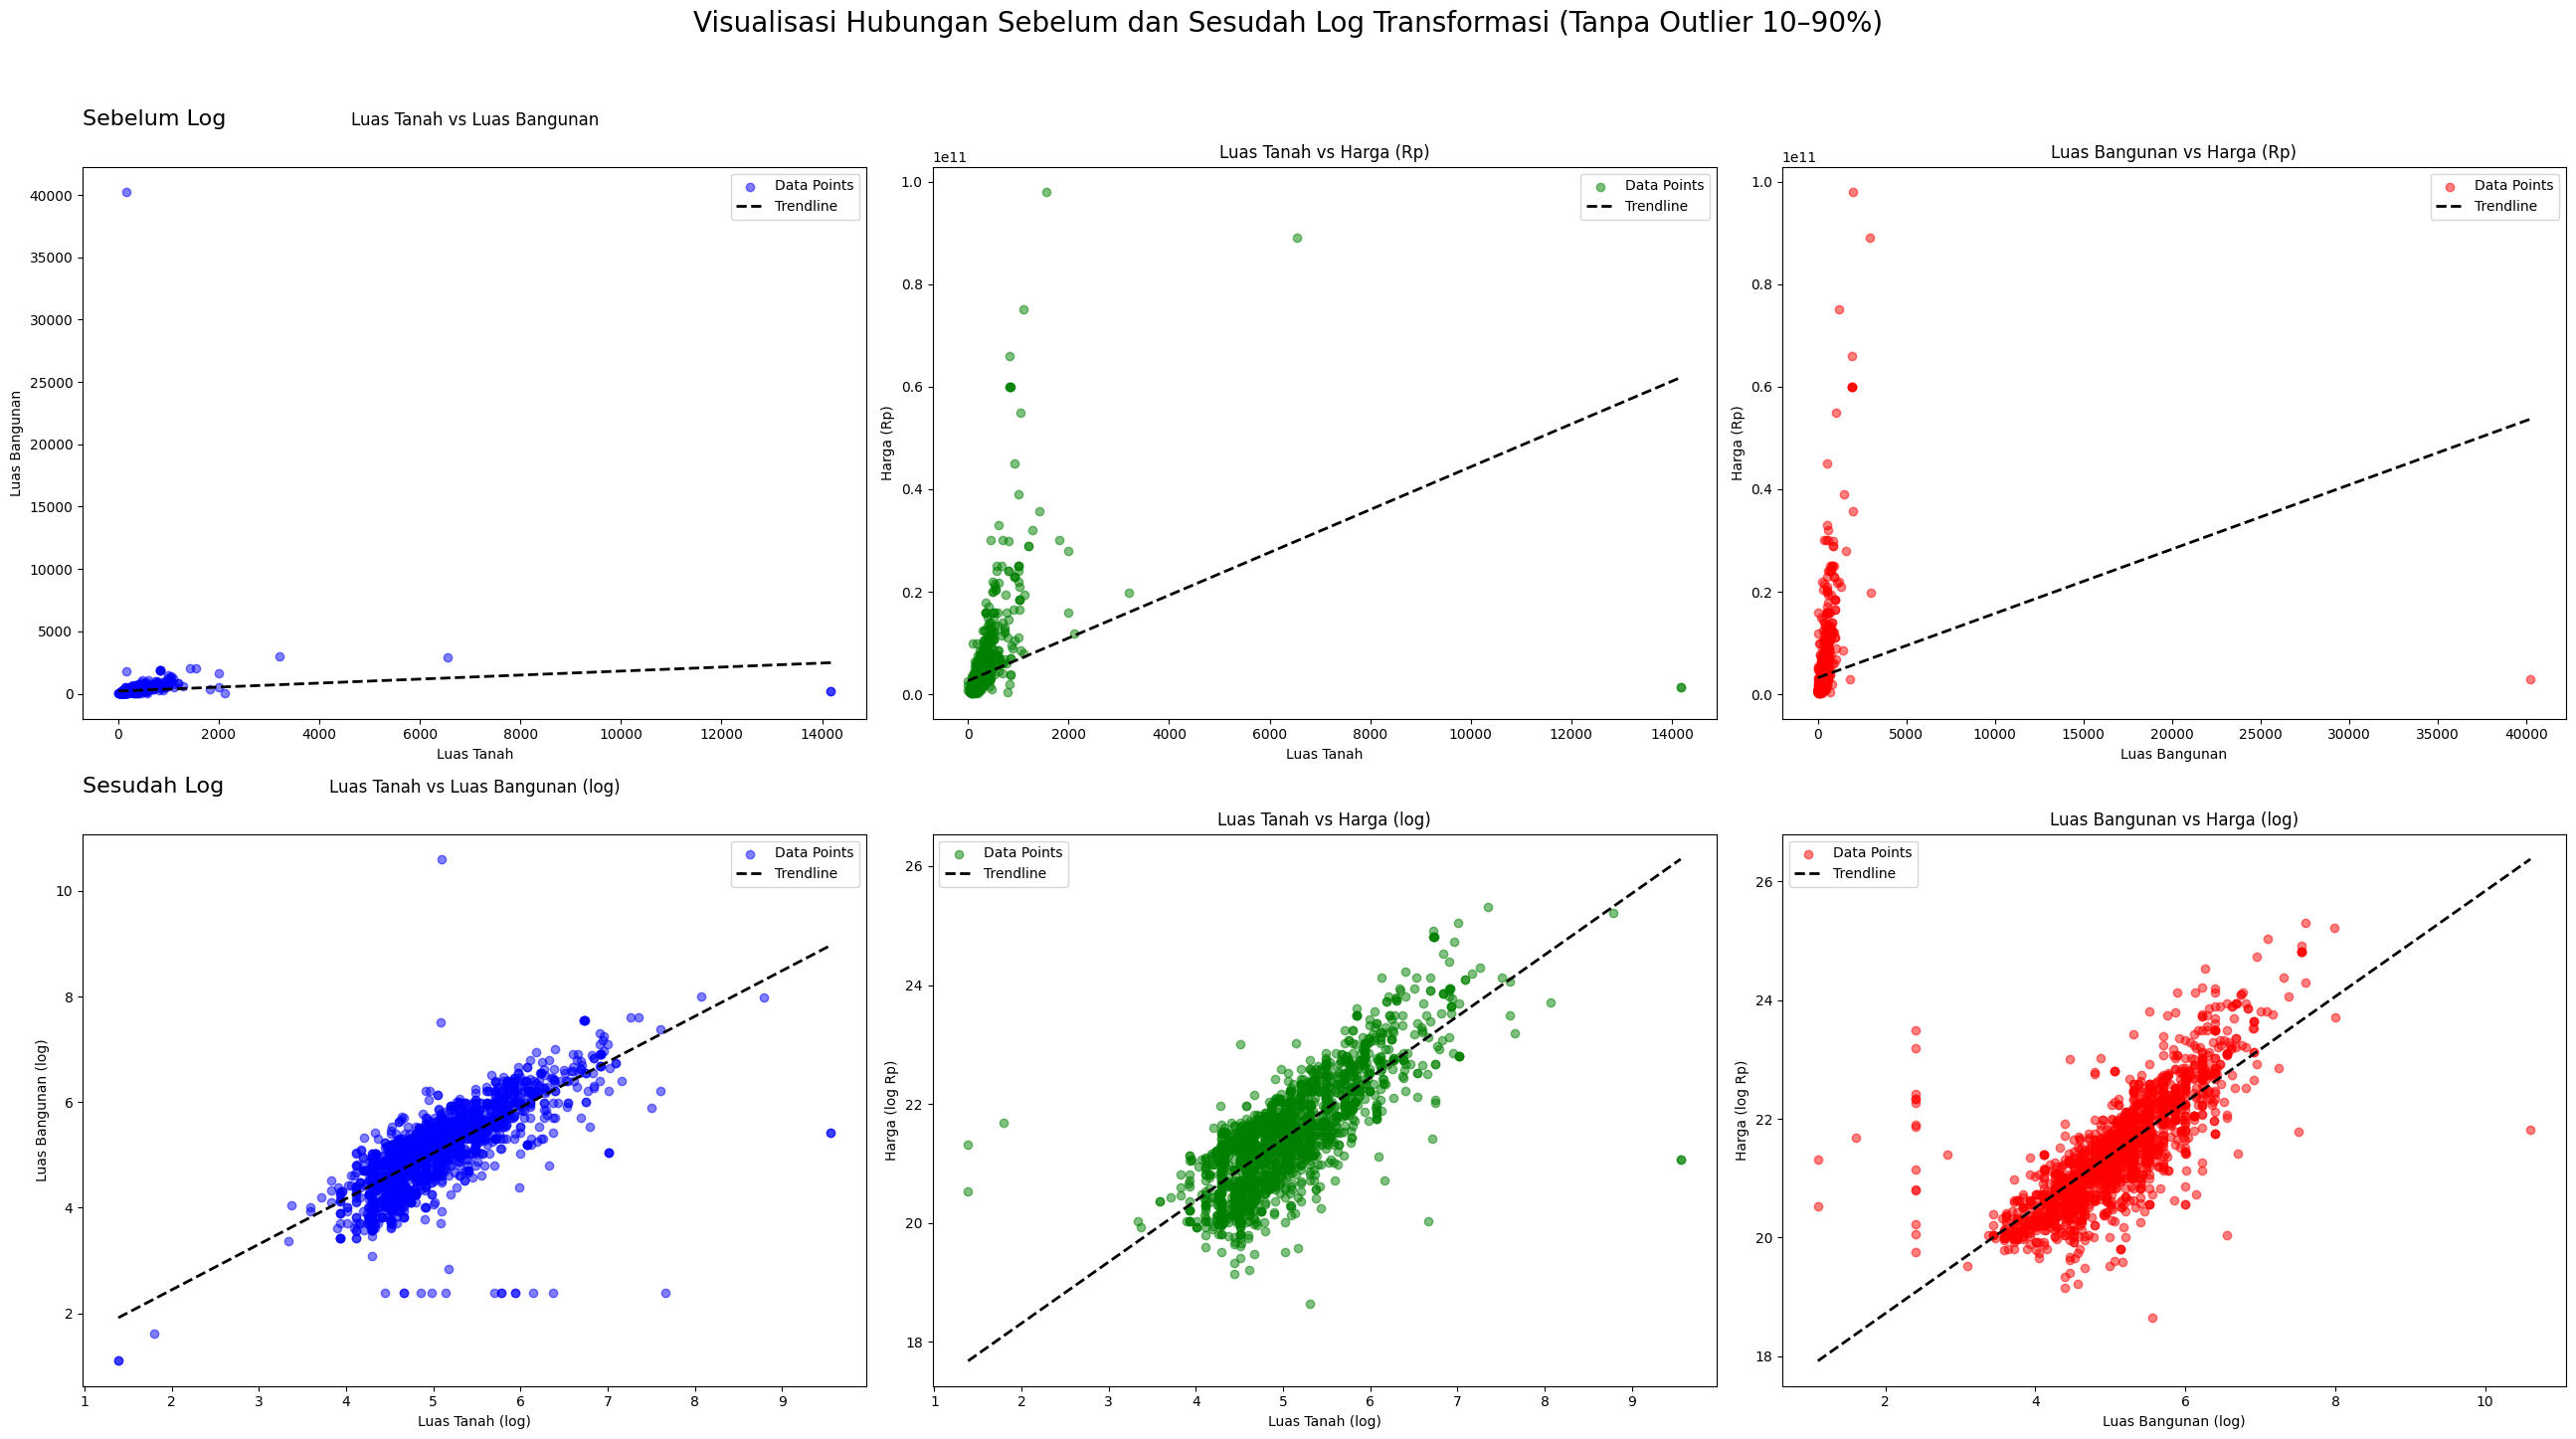

In [37]:
def remove_outliers_iqr(df, cols, lower=0.0001, upper=0.9999):
    """Remove rows with values outside 10th–90th percentiles for specified columns."""
    for col in cols:
        low = df[col].quantile(lower)
        high = df[col].quantile(upper)
        df = df[(df[col] >= low) & (df[col] <= high)]
    return df

# Columns to clean
target_cols = ['Luas Tanah', 'Luas Bangunan', 'Price']

# Remove outliers from original
df_clean_orig = remove_outliers_iqr(df.copy(), target_cols)

# Log-transform and clean
for col in target_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
    df[col] = np.where(df[col] < 0, median_value, df[col])
    df[f'{col} log'] = np.log1p(df[col])

# Remove outliers again but from log-transformed columns
log_cols = [f'{col} log' for col in target_cols]
df_clean_log = remove_outliers_iqr(df.copy(), log_cols)

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(26, 14))

# Before Log
plot_with_regression(axes[0, 0], df_clean_orig['Luas Tanah'], df_clean_orig['Luas Bangunan'],
                     "Luas Tanah", "Luas Bangunan", "Luas Tanah vs Luas Bangunan", "blue")
plot_with_regression(axes[0, 1], df_clean_orig['Luas Tanah'], df_clean_orig['Price'],
                     "Luas Tanah", "Harga (Rp)", "Luas Tanah vs Harga (Rp)", "green")
plot_with_regression(axes[0, 2], df_clean_orig['Luas Bangunan'], df_clean_orig['Price'],
                     "Luas Bangunan", "Harga (Rp)", "Luas Bangunan vs Harga (Rp)", "red")

# After Log
plot_with_regression(axes[1, 0], df_clean_log['Luas Tanah log'], df_clean_log['Luas Bangunan log'],
                     "Luas Tanah (log)", "Luas Bangunan (log)", "Luas Tanah vs Luas Bangunan (log)", "blue")
plot_with_regression(axes[1, 1], df_clean_log['Luas Tanah log'], df_clean_log['Price log'],
                     "Luas Tanah (log)", "Harga (log Rp)", "Luas Tanah vs Harga (log)", "green")
plot_with_regression(axes[1, 2], df_clean_log['Luas Bangunan log'], df_clean_log['Price log'],
                     "Luas Bangunan (log)", "Harga (log Rp)", "Luas Bangunan vs Harga (log)", "red")

# Titles
fig.suptitle("Visualisasi Hubungan Sebelum dan Sesudah Log Transformasi (Tanpa Outlier 10–90%)", fontsize=20, y=1.03)
axes[0, 0].set_title("Sebelum Log", loc='left', fontsize=16, pad=30)
axes[1, 0].set_title("Sesudah Log", loc='left', fontsize=16, pad=30)

plt.tight_layout()
plt.show()

bisa diamati dari relasi dari exponensial menjadi linear karena di logaritmik

## Coorelation Object column for Price

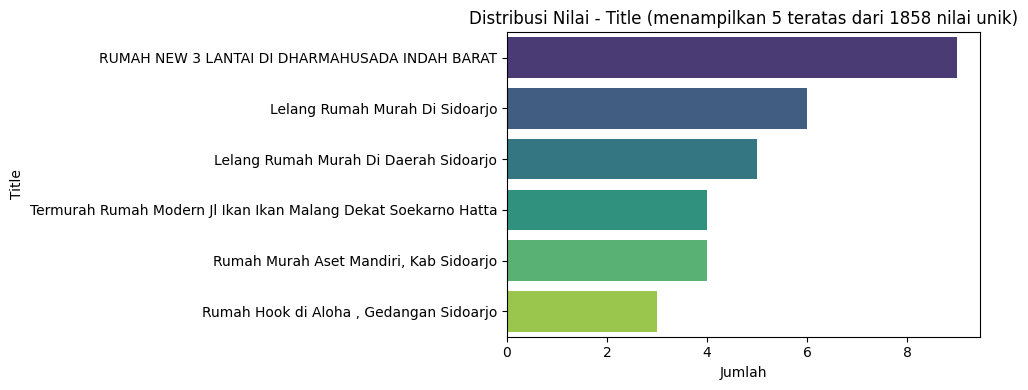

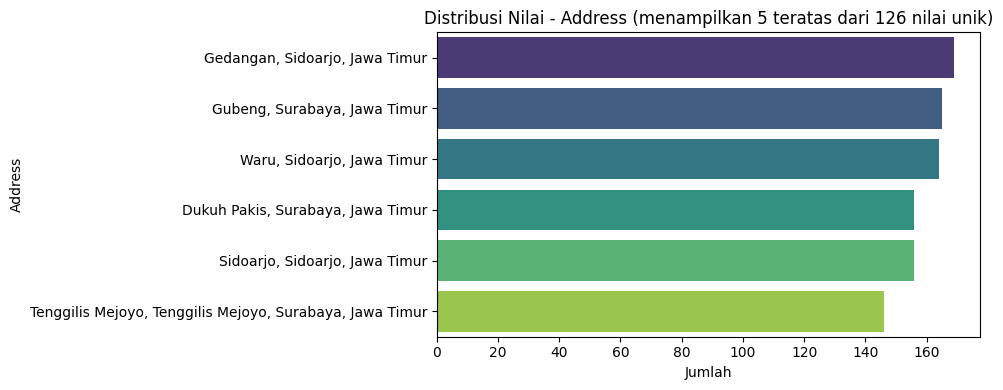

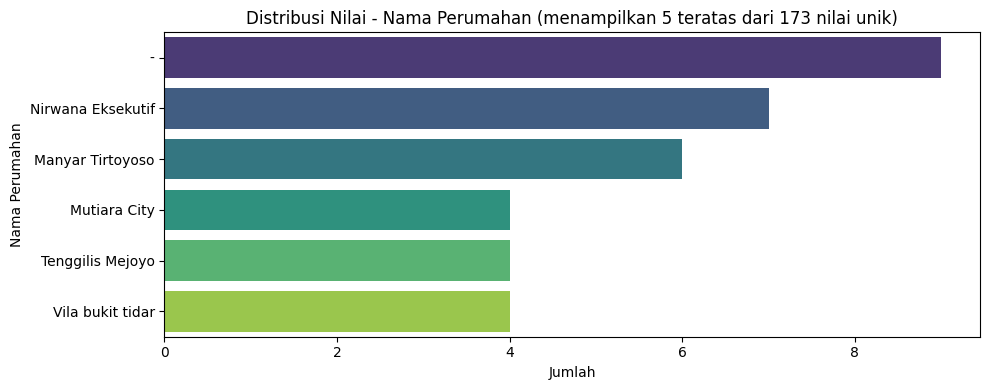

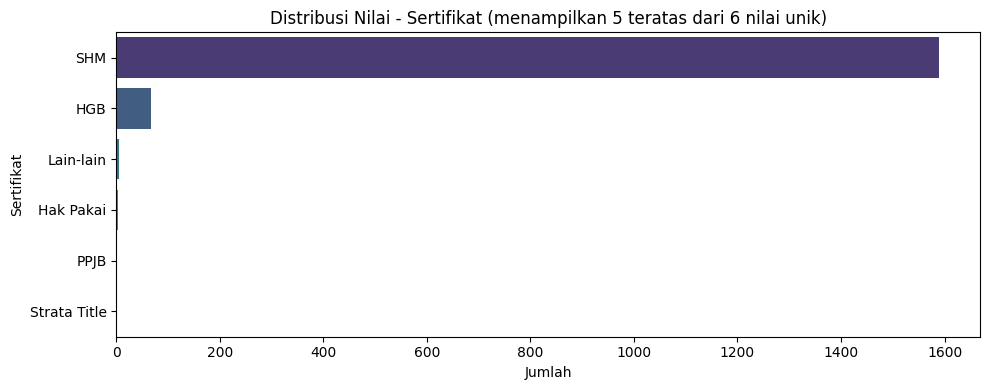

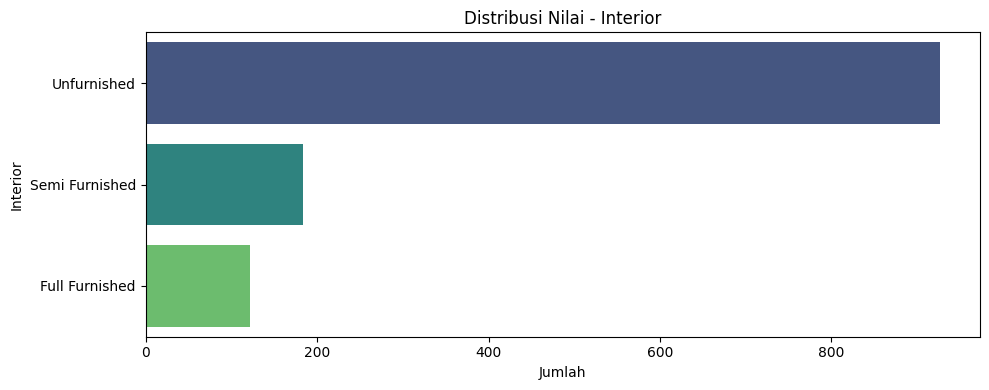

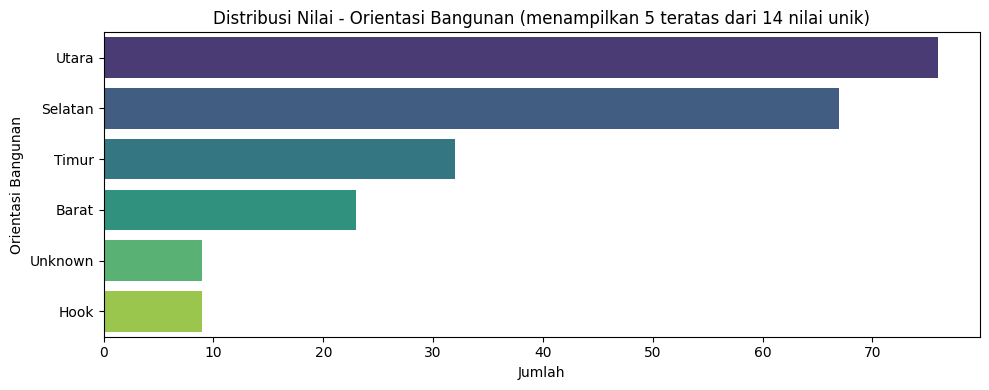

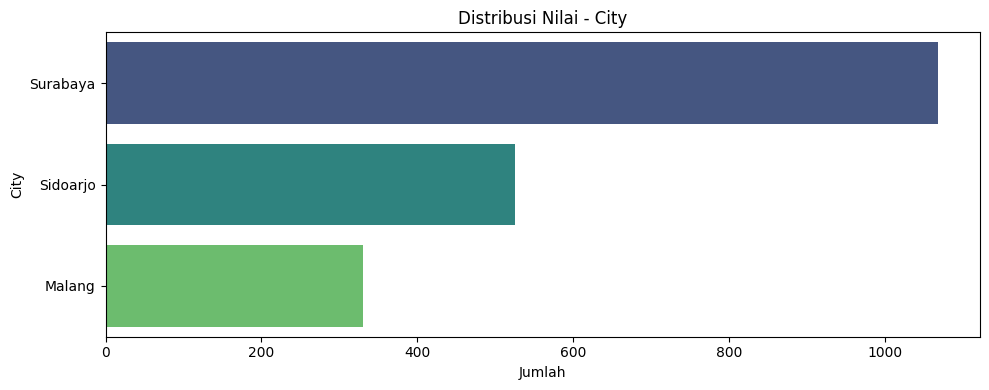

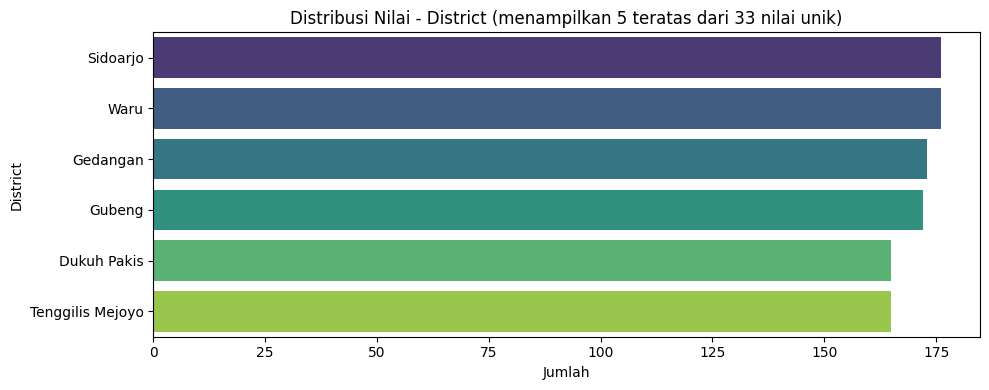

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select object columns
obj_cols = df.select_dtypes(include='object').columns

# Plot value counts (top 10) for each categorical column
for col in obj_cols:
    if col == 'images_path':
        continue  # Skip 'images_path' column
    
    unique_vals = df[col].dropna().nunique()
    if unique_vals <= 1:
        continue

    plt.figure(figsize=(10, 4))
    sns.countplot(
        data=df, 
        y=col, 
        order=df[col].value_counts().iloc[:6].index, 
        palette='viridis'
    )

    # Custom title logic
    if unique_vals > 5:
        title = f"Distribusi Nilai - {col} (menampilkan 5 teratas dari {unique_vals} nilai unik)"
    else:
        title = f"Distribusi Nilai - {col}"

    plt.title(title)
    plt.xlabel("Jumlah")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [39]:
# Select object columns
obj_cols = df.select_dtypes(include='object').columns

unique_counts = []

# Print unique values for each relevant object column
for col in obj_cols:
    if col in ['images_path', 'Title']:
        continue  # Skip specified columns
    
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) <= 1:
        continue  # Skip columns with only one unique value

    unique_counts.append(len(unique_vals))
    # Uncomment below to print each unique value if needed
    # print(f"\nKolom: {col} ({len(unique_vals)} nilai unik)")
    # print(unique_vals)

# Print the mean number of unique values
if unique_counts:
    mean_uniques = sum(unique_counts) / len(unique_counts)
    print(f"\nRata-rata jumlah nilai unik: {mean_uniques:.2f} dari {len(unique_counts)} kolom,")
else:
    print("\nTidak ada kolom yang memenuhi syarat.")


Rata-rata jumlah nilai unik: 51.14 dari 7 kolom,


357.98 jika dikalikan, maka FE OH akan membuat curse of dimensionality, maka approach lain yang bisa digunakan seperti
- label encoding
- ordinal encoding
- target encoding

## Low uniqe coorelation with Price

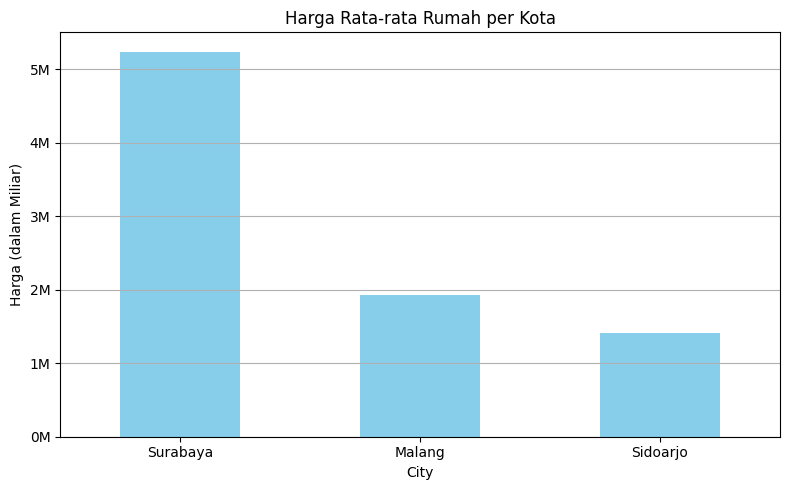

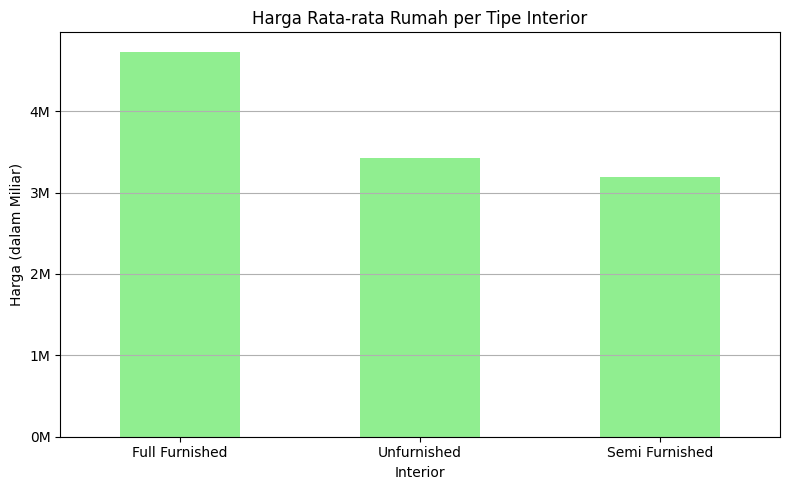

In [107]:
import matplotlib.pyplot as plt

# Harga rata-rata per Kota
mean_by_city = df.groupby('City')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
mean_by_city.plot(kind='bar', color='skyblue')
plt.title('Harga Rata-rata Rumah per Kota')
plt.ylabel('Harga (dalam Miliar)')
plt.xticks(rotation=0)
plt.yticks(
    ticks=range(0, int(mean_by_city.max()), 1_000_000_000),
    labels=[f'{x}M' for x in range(0, int(mean_by_city.max() // 1_000_000_000) + 1)]
)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Harga rata-rata per Interior
mean_by_interior = df.groupby('Interior')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
mean_by_interior.plot(kind='bar', color='lightgreen')
plt.title('Harga Rata-rata Rumah per Tipe Interior')
plt.ylabel('Harga (dalam Miliar)')
plt.xticks(rotation=0)
plt.yticks(
    ticks=range(0, int(mean_by_interior.max()), 1_000_000_000),
    labels=[f'{x}M' for x in range(0, int(mean_by_interior.max() // 1_000_000_000) + 1)]
)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


- Surabaya punya harga rata-rata tertinggi (5,2M), jauh di atas Malang (1,9M) & Sidoarjo (1,4M).  
- Rumah **Full Furnished** cenderung lebih mahal (4,7M) dibanding **Unfurnished** (3,4M) dan **Semi Furnished** (3,2M).  


## FE

beberapa fe bisa dilakukan seperti
- Log tranform
- Object encoding
- perubahan tahun dibangun -> umur

# Text
---

In [75]:
df_text = df[['ID','Title','Price']].copy()

# Calculate title length metrics
df_text['char_count'] = df_text['Title'].apply(len)
df_text['word_count'] = df_text['Title'].apply(lambda x: len(x.split()))
df_text = df_text[df_text['Price'] < df_text['Price'].max()]	
df_text =df_text[df_text['char_count'] <=175]

## Length

In [76]:
# Function to plot scatter and regression line
def plot_with_regression(ax, x, y, xlabel, ylabel, title, color):
    ax.scatter(x, y, alpha=0.5, color=color, label="Data Points")
    
    # Fit linear regression line (without ML model)
    coef = np.polyfit(x, y, 1)  # 1st-degree polynomial (linear)
    poly1d_fn = np.poly1d(coef)
    
    # Plot regression line
    ax.plot(np.sort(x), poly1d_fn(np.sort(x)), color="black", linestyle="dashed", linewidth=2, label="Trendline")
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

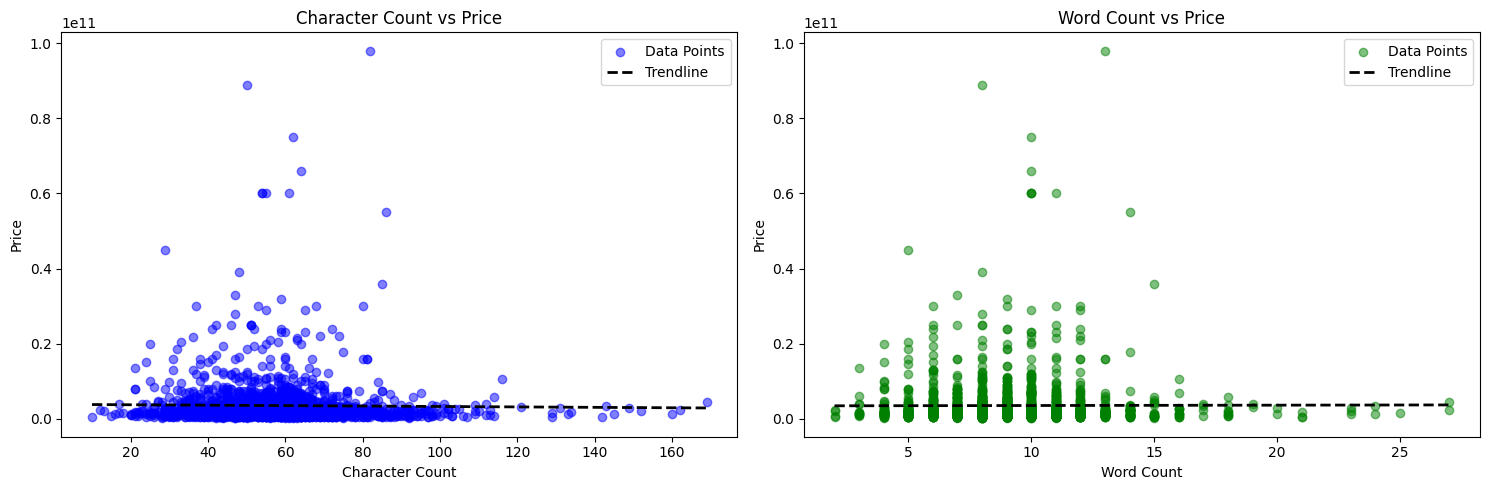

In [77]:
# Plot relationship between title length and price
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Use custom plotting function
plot_with_regression(
    axes[0], df_text['char_count'], df_text['Price'],
    xlabel='Character Count', ylabel='Price',
    title='Character Count vs Price', color='blue'
)

plot_with_regression(
    axes[1], df_text['word_count'], df_text['Price'],
    xlabel='Word Count', ylabel='Price',
    title='Word Count vs Price', color='green'
)

plt.tight_layout()
plt.show()

## Word Frequency Analysis

In [78]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [79]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Prepare Indonesian stopwords
factory = StopWordRemoverFactory()
stopwords_id = factory.get_stop_words()

# Clean and tokenize text
def preprocess(text):
    text = text.lower()
    text = ''.join([c for c in text if c.isalnum() or c == ' '])
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords_id]
    return tokens

df_text['tokens'] = df_text['Title'].apply(preprocess)

In [82]:
# Flatten all tokens
all_tokens = [token for tokens in df_text['tokens'] for token in tokens]

# Get bigrams
bigrams = list(nltk.bigrams(all_tokens))
bigram_counts = Counter(bigrams)
total_bigrams = sum(bigram_counts.values())

# Display top 30 bigrams with percentage
print("🔝 Top 10 Bigrams (with percentage):")
for bigram, count in bigram_counts.most_common(10):
    percentage = (count / total_bigrams) * 100
    print(f"{bigram[0]} {bigram[1]}: {count} ({percentage:.2f}%)")

🔝 Top 10 Bigrams (with percentage):
siap huni: 297 (1.83%)
dijual rumah: 234 (1.44%)
2 lantai: 192 (1.18%)
rumah baru: 137 (0.84%)
pakuwon city: 136 (0.84%)
malang rumah: 130 (0.80%)
sidoarjo rumah: 117 (0.72%)
rumah 2: 109 (0.67%)
surabaya rumah: 108 (0.66%)
rumah siap: 90 (0.55%)


In [84]:
import numpy as np
from collections import Counter

# Preprocess if not done already
df_text['tokens'] = df_text['Title'].apply(preprocess)

# Compute 10th and 90th percentiles of price
p10 = np.percentile(df_text['Price'], 10)
p90 = np.percentile(df_text['Price'], 90)

# Get top 100 words for each group
low_top = dict(low_counts.most_common(100))
high_top = dict(high_counts.most_common(100))

# Find common words
common_words = set(low_top.keys()) & set(high_top.keys())

# Filter out common words from both
low_unique = {word: count for word, count in low_top.items() if word not in common_words}
high_unique = {word: count for word, count in high_top.items() if word not in common_words}

# Show top 20 unique words per group
print("🔻 Unique Top 20 Words in Cheapest 10%:")
for word, count in sorted(low_unique.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{word}: {count}")

print("\n🔺 Unique Top 20 Words in Most Expensive 10%:")
for word, count in sorted(high_unique.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{word}: {count}")

# Compare common words in both
common_words = set([w for w, _ in low_counts.most_common(100)]) & set([w for w, _ in high_counts.most_common(100)])
print(f"\n🔁 Common words in top 100 of both low and high price groups:\n{sorted(common_words)}")

🔻 Unique Top 20 Words in Cheapest 10%:
gedangan: 20
kampus: 19
merjosari: 15
perumahan: 14
waru: 14
modern: 14
rungkut: 11
lelang: 11
lowokwaru: 10
bisnis: 9
jutaan: 9
alana: 9
free: 9
biaya: 9
perum: 9
kawasan: 9
juanda: 8
medokan: 7
wonorejo: 7
dp: 7

🔺 Unique Top 20 Words in Most Expensive 10%:
pakuwon: 25
pakis: 22
dukuh: 20
raya: 17
jalan: 17
graha: 14
indah: 13
galaxy: 12
bukit: 11
permai: 10
villa: 9
kupang: 9
darmo: 9
house: 8
full: 8
araya: 8
usaha: 8
furnish: 8
famili: 8
biliton: 7

🔁 Common words in top 100 of both low and high price groups:
['1', '2', 'area', 'asri', 'bagus', 'bangunan', 'baru', 'bumi', 'city', 'dekat', 'dijual', 'grand', 'gubeng', 'harga', 'hatta', 'huni', 'hunian', 'jl', 'jual', 'kost', 'kota', 'kpr', 'lantai', 'lb', 'lokasi', 'lt', 'luas', 'malang', 'mewah', 'minimalis', 'murah', 'premium', 'puri', 'regency', 'rumah', 'shm', 'siap', 'sidoarjo', 'strategis', 'surabaya', 'tanah', 'tengah', 'timur']


- **Kata Umum di Semua Harga:**  
  Kata seperti *rumah*, *strategis*, *dijual*, *luas*, *lt/lb*, dan kota besar seperti *Surabaya*, *Sidoarjo*, *Malang* muncul di kedua kelompok.

- **10% Termurah:**  
  Fokus pada kata seperti **lelang**, **dp**, **free**, serta lokasi seperti **Gedangan**, **Waru**, **Merjosari**, menekankan harga terjangkau dan dekat kampus.

- **10% Termahal:**  
  Mengandung kata seperti **Pakuwon**, **Darmo**, **Galaxy**, **Villa**, menonjolkan kemewahan, area elit, dan properti fully-furnished.

- **Kesimpulan:**  
  Judul iklan murah fokus pada nilai dan lokasi strategis. Iklan mahal lebih menekankan gaya hidup dan eksklusivitas.

## Topic Modeling

In [89]:
df_text.shape

(1921, 6)

In [101]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Create a document-term matrix
vectorizer = CountVectorizer(max_df=0.9, min_df=0.01, max_features=1000)
dtm = vectorizer.fit_transform(df_text['Title'])

# Train LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Get topic distribution for each row
topic_distributions = lda.transform(dtm)
dominant_topic = np.argmax(topic_distributions, axis=1)

# Add to df_text
df_text = df_text.copy()
df_text['Topic'] = dominant_topic

# Function to convert price to Indonesian-style string
def format_price_idr(value):
    if value >= 1_000_000_000:
        return f"{value / 1_000_000_000:.1f} miliar"
    elif value >= 1_000_000:
        return f"{value / 1_000_000:.1f} juta"
    else:
        return f"{value:,.0f}"

# Display topics with mean prices
def print_topics_with_prices(model, vectorizer, df, n_words=10):
    for idx, topic in enumerate(model.components_):
        top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]]
        mean_price = df[df['Topic'] == idx]['Price'].mean()
        # In your loop:
        formatted_price = format_price_idr(mean_price)
        print(f"Topic {idx} dengan harga rata-rata: {formatted_price}")
        #print(f"Topic {idx} with mean price: {mean_price:,.0f}")
        print(top_words)
        print()

print_topics_with_prices(lda, vectorizer, df_text)

Topic 0 dengan harga rata-rata: 4.0 miliar
['lantai', 'indah', 'mejoyo', 'pondok', 'di', 'tenggilis', 'surabaya', 'dijual', 'huni', 'siap']

Topic 1 dengan harga rata-rata: 2.0 miliar
['huni', 'jaya', 'siap', 'waru', 'puri', 'soekarno', 'hatta', 'malang', 'di', 'sidoarjo']

Topic 2 dengan harga rata-rata: 3.9 miliar
['strategis', 'kota', 'raya', 'gubeng', 'lokasi', 'dijual', 'gress', 'baru', 'surabaya', 'di']

Topic 3 dengan harga rata-rata: 4.4 miliar
['di', 'lantai', 'dekat', 'sam', 'regency', 'minimalis', 'surabaya', 'murah', 'city', 'pakuwon']

Topic 4 dengan harga rata-rata: 3.7 miliar
['modern', 'strategis', 'bangunan', 'dekat', 'luas', 'lb', 'area', 'lt', 'malang', 'di']



In [102]:
# Step 1: Bin price into 6 quantiles
df_text['Price_Bin'] = pd.qcut(df_text['Price'], q=6, labels=[f'Q{i+1}' for i in range(6)])

# Step 2: Compute dominant topic and its percentage
result = []
for bin_label, group in df_text.groupby('Price_Bin'):
    topic_counts = group['Topic'].value_counts()
    dominant_topic = topic_counts.idxmax()
    percentage = (topic_counts.max() / len(group)) * 100
    result.append((bin_label, dominant_topic, percentage))

# Step 3: Display results
print("🎯 Dominant Topic in Each Price Bin with Percentage:")
for bin_label, topic, pct in result:
    print(f"{bin_label}: Topic {topic} ({pct:.0f}%)")

🎯 Dominant Topic in Each Price Bin with Percentage:
Q1: Topic 1 (39%)
Q2: Topic 1 (35%)
Q3: Topic 0 (24%)
Q4: Topic 0 (30%)
Q5: Topic 0 (27%)
Q6: Topic 3 (30%)


<ipython-input-102-37e7404b99ca>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for bin_label, group in df_text.groupby('Price_Bin'):


- Topik 1 mendominasi pada harga rendah (Q1–Q2), menggambarkan rumah di Sidoarjo dan Malang.
- Topik 0 dan 3 muncul di harga tinggi (Q4–Q6), terkait Surabaya, konsep minimalis, dan kawasan elit seperti Pakuwon.

# image
---

## Width and Height

In [147]:
df['images_path'] = df['images_path'].str.replace('images/', '/kaggle/input/multimodal-all-kcv/images/')

In [148]:
df['images_path'].head()

0    /kaggle/input/multimodal-all-kcv/images/image-...
1    /kaggle/input/multimodal-all-kcv/images/image-...
2    /kaggle/input/multimodal-all-kcv/images/image-...
3    /kaggle/input/multimodal-all-kcv/images/image-...
4    /kaggle/input/multimodal-all-kcv/images/image-...
Name: images_path, dtype: object

In [149]:
from PIL import Image
import os

img_sizes = []

for path in df['images_path']:  # ganti dengan kolom path gambar kamu
    with Image.open(path) as img:
        img_sizes.append(img.size)  # (width, height)

# Convert to DataFrame for EDA
img_df = pd.DataFrame(img_sizes, columns=['Width', 'Height'])

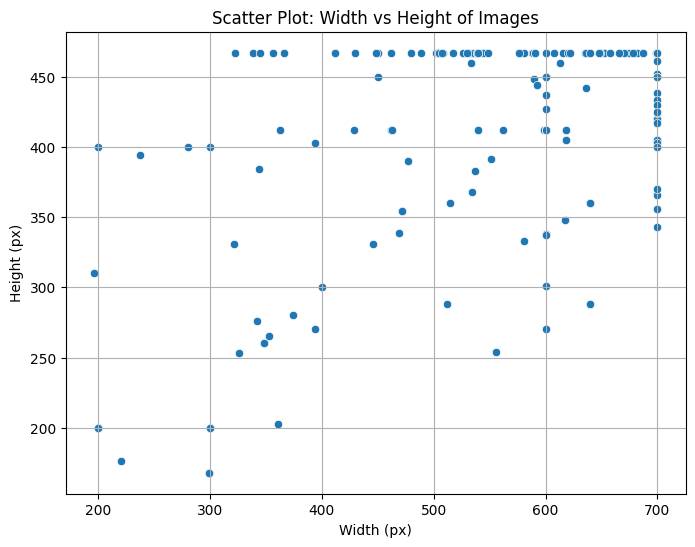

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=img_df, x='Width', y='Height')
plt.title('Scatter Plot: Width vs Height of Images')
plt.xlabel('Width (px)')
plt.ylabel('Height (px)')
plt.grid(True)
plt.show()

In [169]:
img_df['Resolution'] = img_df['Width'] * img_df['Height']
df['Resolution'] = img_df['Resolution']
df['Width'] = img_df['Width']
df['Height'] = img_df['Height']

In [153]:
correlation = df[['Resolution', 'Price']].corr().iloc[0, 1]
print(f"Korelasi resolusi dan harga: {correlation:.2f}")

Korelasi resolusi dan harga: -0.03


In [160]:
# Tambahkan kolom rasio aspek
img_df['Aspect_Ratio'] = img_df['Width'] / img_df['Height']

# Kategorikan sebagai 'Portrait', 'Landscape', atau 'Square'
def categorize_orientation(row):
    if row['Aspect_Ratio'] > 1.1:
        return 'Landscape'
    elif row['Aspect_Ratio'] < 0.9:
        return 'Portrait'
    else:
        return 'Square'

img_df['Orientation'] = img_df.apply(categorize_orientation, axis=1)

# Gabungkan dengan df harga
df['Orientation'] = img_df['Orientation']

# Cek rata-rata harga berdasarkan orientasi gambar
orientation_price = df.groupby('Orientation')['Price'].mean().round(-6)

print("💰 Rata-rata Harga Berdasarkan Orientasi Gambar:")
print(orientation_price)

💰 Rata-rata Harga Berdasarkan Orientasi Gambar:
Orientation
Landscape    3.566000e+09
Portrait     3.379000e+09
Square       9.697000e+09
Name: Price, dtype: float64


In [170]:
df['Aspect_Ratio'] = img_df['Aspect_Ratio']

In [161]:
# Hitung total masing-masing orientasi
orientation_counts = img_df['Orientation'].value_counts(normalize=True) * 100

# Bulatkan biar rapi
orientation_percent = orientation_counts.round(2)

print("📸 Persentase Orientasi Gambar:")
print(orientation_percent)

📸 Persentase Orientasi Gambar:
Orientation
Landscape    98.23
Square        0.99
Portrait      0.78
Name: proportion, dtype: float64


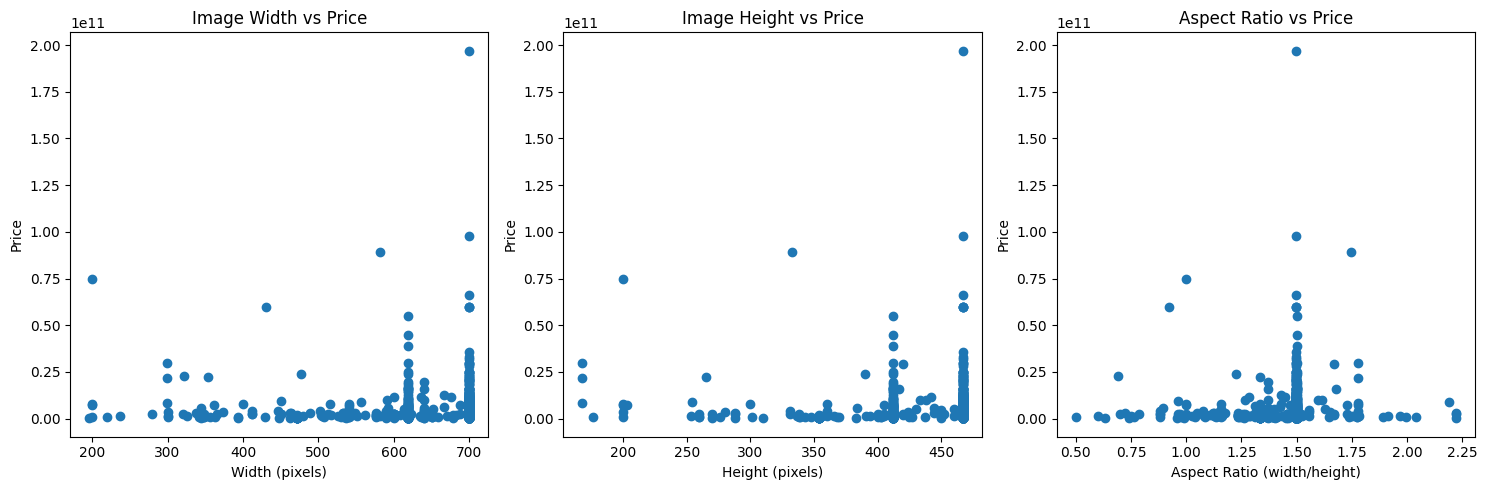

In [171]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['Width'], df['Price'])
plt.title('Image Width vs Price')
plt.xlabel('Width (pixels)')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
plt.scatter(df['Height'], df['Price'])
plt.title('Image Height vs Price')
plt.xlabel('Height (pixels)')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
plt.scatter(df['Aspect_Ratio'], df['Price'])
plt.title('Aspect Ratio vs Price')
plt.xlabel('Aspect Ratio (width/height)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

## Brightness

In [163]:
import numpy as np

def average_brightness(img_path):
    img = Image.open(img_path).convert('L')  # grayscale
    return np.array(img).mean()

df['Brightness'] = df['images_path'].apply(average_brightness)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


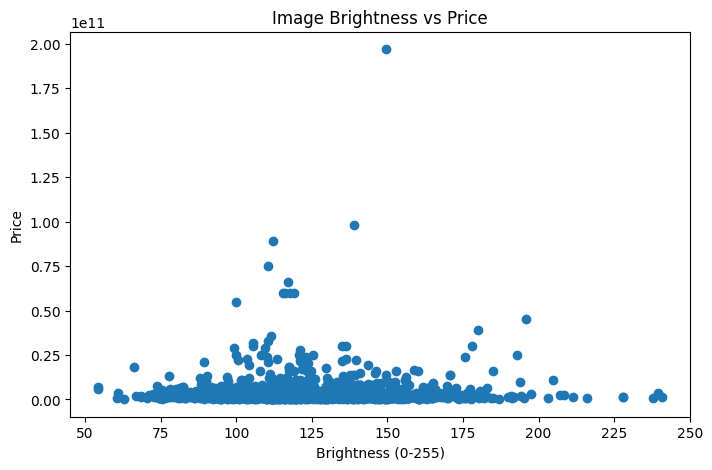

In [173]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Brightness'], df['Price'])
plt.title('Image Brightness vs Price')
plt.xlabel('Brightness (0-255)')
plt.ylabel('Price')
plt.show()

## basic inpection

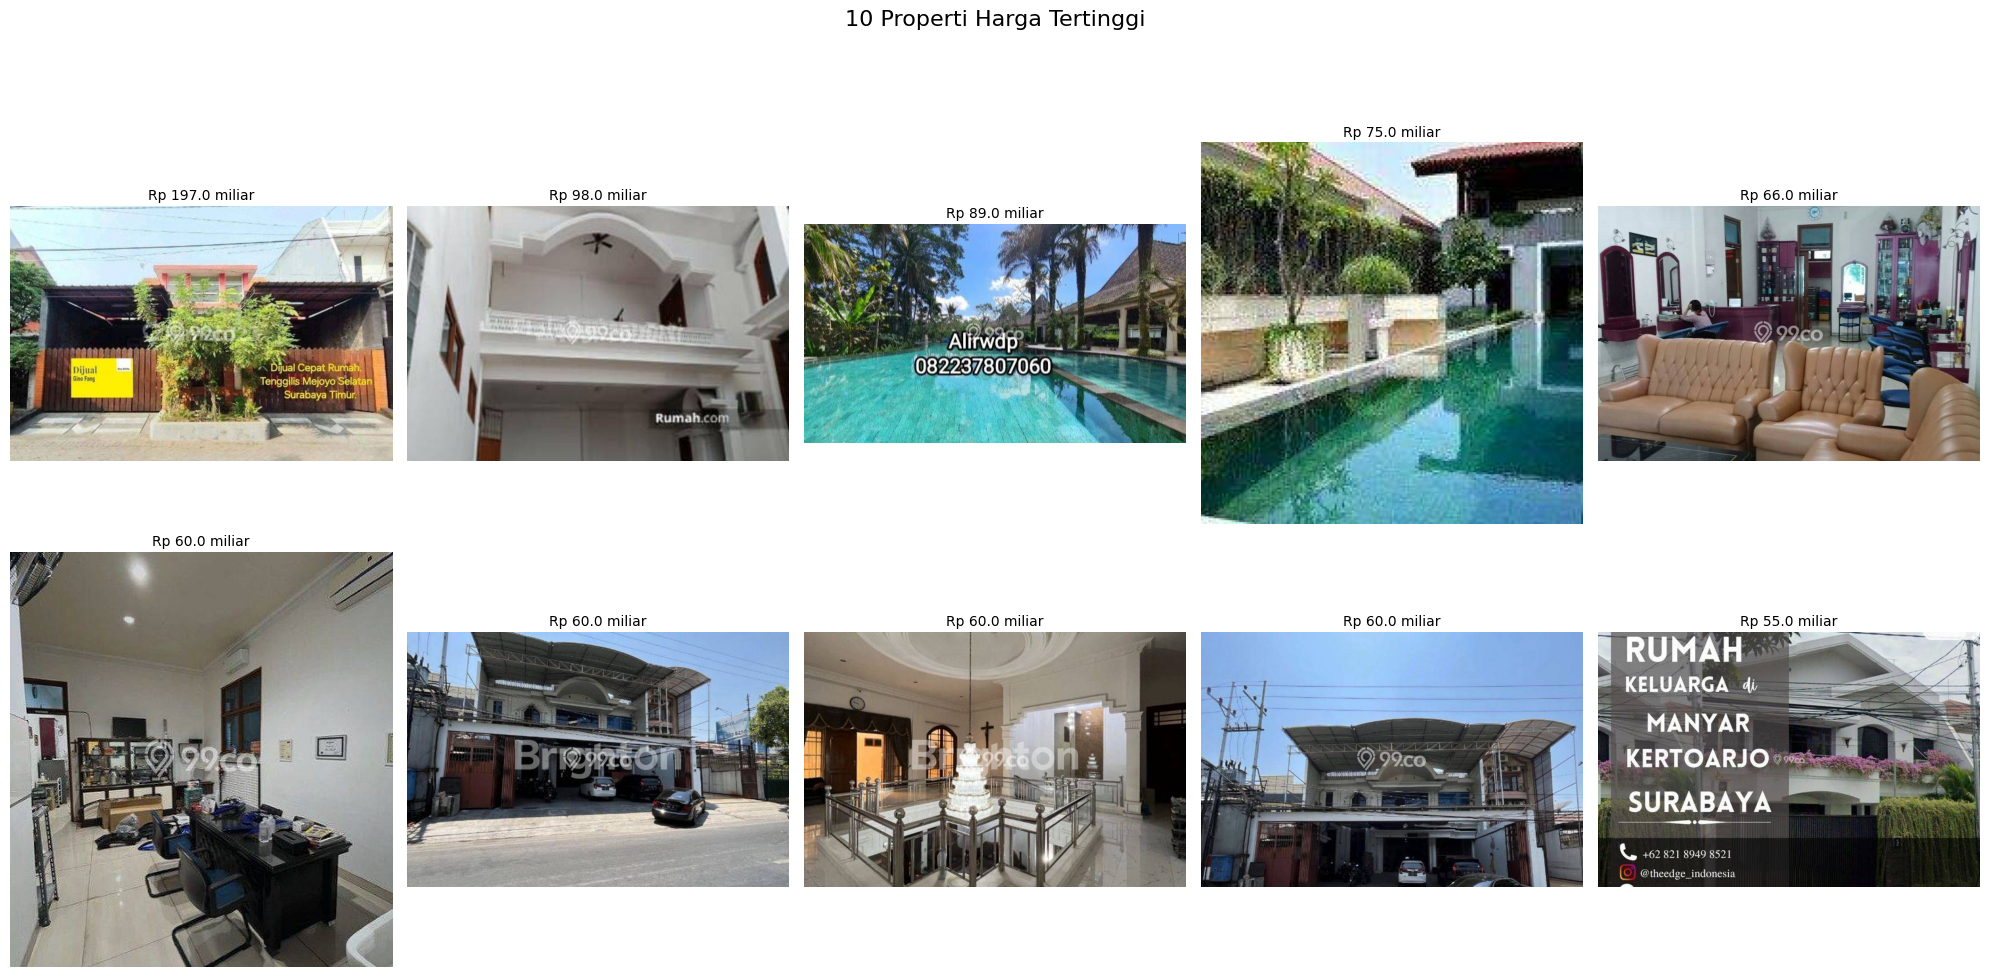

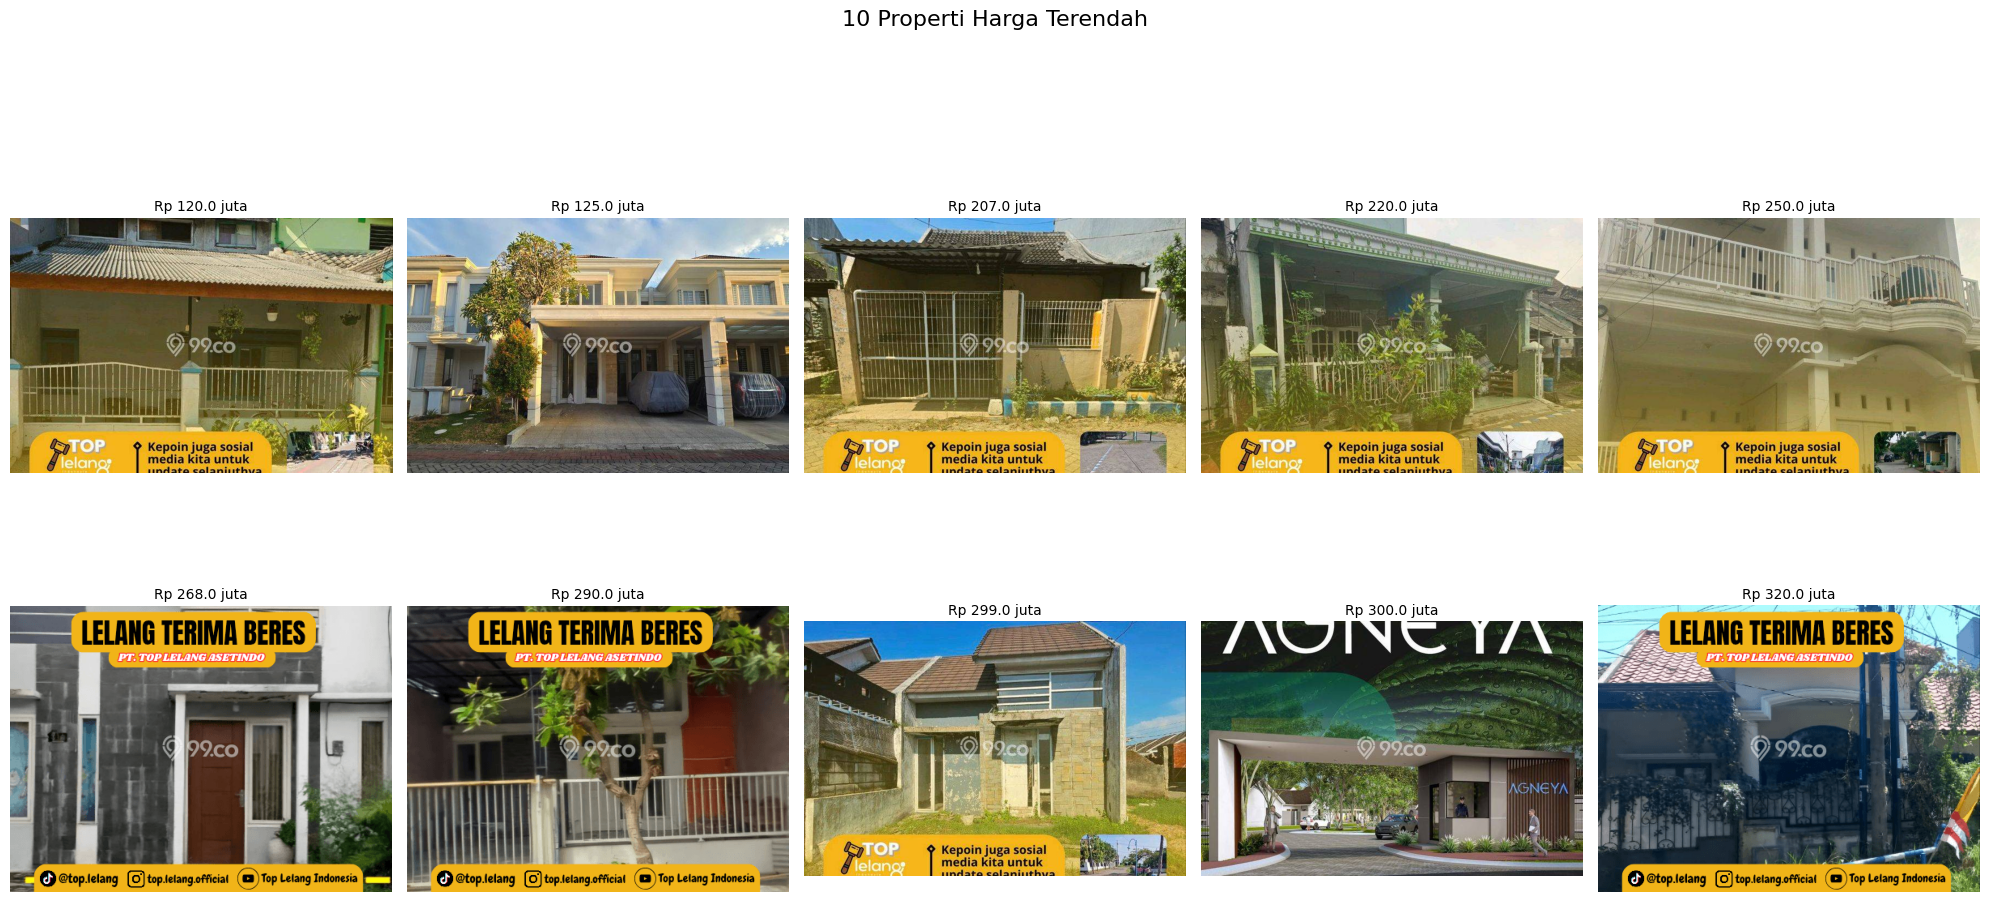

In [180]:
# Get top and bottom 10 priced properties
top_priced = df.nlargest(10, 'Price')
low_priced = df.nsmallest(10, 'Price')

# Display images in 2 rows x 5 columns
def display_images(paths, prices, title):
    plt.figure(figsize=(20, 10))  # Increase figure size for better visibility
    
    for i, (path, price) in enumerate(zip(paths, prices)):
        plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
        img = Image.open(path)
        plt.imshow(img)
        
        # Format price using your function
        formatted_price = format_price_idr(price)
        plt.title(f"Rp {formatted_price}", fontsize=10, pad=5)  # Added pad for spacing
        plt.axis('off')
    
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Display top priced properties
display_images(top_priced['images_path'], top_priced['Price'], "10 Properti Harga Tertinggi")

# Display lowest priced properties
display_images(low_priced['images_path'], low_priced['Price'], "10 Properti Harga Terendah")

ada kesamaan